In [1]:
import os
from pathlib import Path
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchinfo

In [2]:
data = pd.read_csv('./data/train.csv')

print('train:',data.shape)

train: (42000, 785)


In [3]:
x = data.iloc[:,data.columns!='label']
y = data.label.values

print('X:',x.shape,type(x))
print('Y:',y.shape,type(y))

X: (42000, 784) <class 'pandas.core.frame.DataFrame'>
Y: (42000,) <class 'numpy.ndarray'>


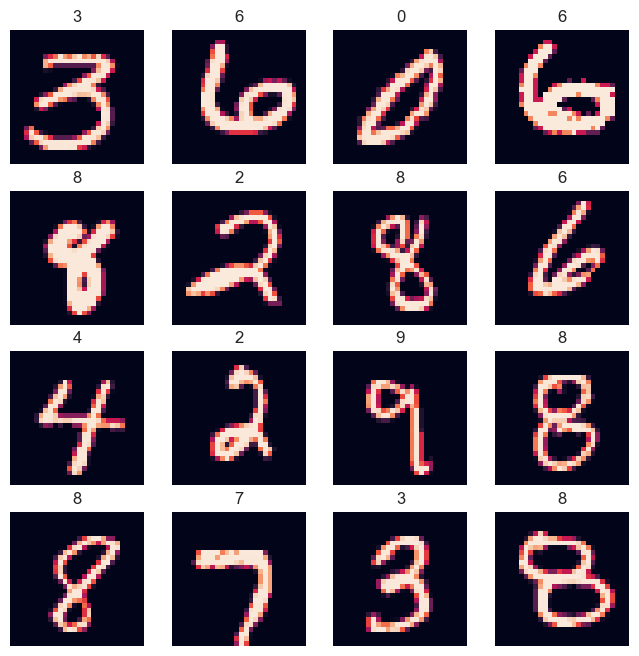

In [4]:
fig = plt.figure(figsize=(8,8))
cols, rows = 4,4

for i in range(1,cols*rows+1):
    sample = np.random.randint(0,len(x)-1)
    label = str(int(y[sample]))
    img = x.values[sample].reshape(28,28)
    
    fig.add_subplot(rows,cols,i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img)

In [5]:
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

# Assuming x and y are defined as in your code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes and types of the resulting arrays
print('Train_X:', x_train.shape, type(x_train))
print('Train_Y:', y_train.shape, type(y_train))
print('Test_X:', x_test.shape, type(x_test))
print('Test_Y:', y_test.shape, type(y_test))

Train_X: (33600, 784) <class 'pandas.core.frame.DataFrame'>
Train_Y: (33600,) <class 'numpy.ndarray'>
Test_X: (8400, 784) <class 'pandas.core.frame.DataFrame'>
Test_Y: (8400,) <class 'numpy.ndarray'>


In [7]:
counts = np.bincount(y_train)
for i, count in enumerate(counts):
    print(f"Count of {i} in y_train: {count}")

Count of 0 in y_train: 3316
Count of 1 in y_train: 3775
Count of 2 in y_train: 3331
Count of 3 in y_train: 3414
Count of 4 in y_train: 3233
Count of 5 in y_train: 3093
Count of 6 in y_train: 3352
Count of 7 in y_train: 3508
Count of 8 in y_train: 3228
Count of 9 in y_train: 3350


In [8]:
counts = np.bincount(y_test)
for i, count in enumerate(counts):
    print(f"Count of {i} in y_test: {count}")

Count of 0 in y_test: 816
Count of 1 in y_test: 909
Count of 2 in y_test: 846
Count of 3 in y_test: 937
Count of 4 in y_test: 839
Count of 5 in y_test: 702
Count of 6 in y_test: 785
Count of 7 in y_test: 893
Count of 8 in y_test: 835
Count of 9 in y_test: 838


In [9]:
def select_data(num, x, y, printed=False):
    selected_x = []
    selected_y = []

    # Iterate over each unique label (0 to 9)
    for label in range(10):

        indices = np.where(y == label)[0]
        np.random.shuffle(indices)
        selected_indices = indices[:num//10]
    
        # Append the selected data points to the final arrays
        selected_x.append(x[selected_indices])
        selected_y.append(y[selected_indices])
    # Concatenate the selected data points to get the final training set
    selected_x = np.concatenate(selected_x)
    selected_y = np.concatenate(selected_y)
    counts = np.bincount(selected_y)
    if printed:
        for i, count in enumerate(counts):
            print(f"Count of {i} in selected_y_train: {count}")
    
    return selected_x, selected_y

In [10]:
import time
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

def train(kernel, c, train_x, train_y):
    svm_model = svm.SVC(C=c, kernel=kernel, probability=True)
    svm_model = OneVsRestClassifier(svm_model)
    svm_model.fit(train_x, train_y)
    return svm_model

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def draw_confusion_matrix(label_true, label_pred, label_name, title="Confusion Matrix"):
    cm = confusion_matrix(y_true=label_true, y_pred=label_pred, normalize='true')

    plt.imshow(cm, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predict label")
    plt.ylabel("Truth label")
    plt.yticks(range(label_name.__len__()), label_name)
    plt.xticks(range(label_name.__len__()), label_name)

    plt.tight_layout()
    plt.colorbar()

    for i in range(label_name.__len__()):
        for j in range(label_name.__len__()):
            color = (1, 1, 1) if i == j else (0, 0, 0)  # 对角线字体白色，其他黑色
            value = float(format('%.2f' % cm[j, i]))
            plt.text(i, j, value, va='center', ha='center', color=color)
    plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def test(svm_model, test_x, test_y, filename=None):
    
    predictions = svm_model.predict(test_x)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_y, predictions)*100
    print(f"Accuracy: {accuracy:.6f}%")
    
    draw_confusion_matrix(label_true=test_y,
                      label_pred=predictions,
                      label_name=["0", "1", "2", "3", "4", "5", "6","7","8","9"],
                      title="Confusion Matrix")
    
    report_dict = classification_report(test_y, predictions, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    if filename:
        report_df.to_csv(filename, index=False)
    
    print(report_df)



Kernel=sigmoid C=0.01 start training
Kernel=sigmoid C=0.01 Training spent 92.072108s.
Accuracy: 72.700000%


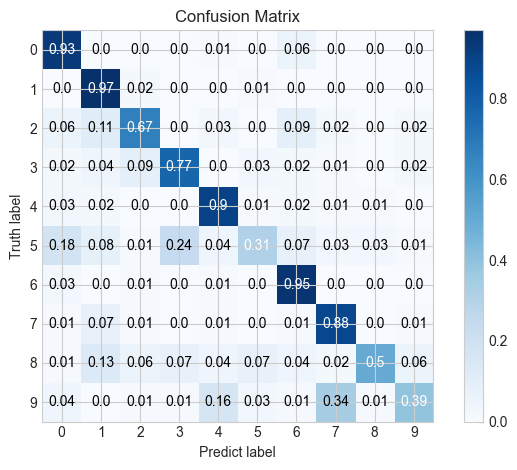

              precision  recall  f1-score   support
0              0.709924   0.930  0.805195   100.000
1              0.683099   0.970  0.801653   100.000
2              0.761364   0.670  0.712766   100.000
3              0.706422   0.770  0.736842   100.000
4              0.750000   0.900  0.818182   100.000
5              0.673913   0.310  0.424658   100.000
6              0.748031   0.950  0.837004   100.000
7              0.671756   0.880  0.761905   100.000
8              0.909091   0.500  0.645161   100.000
9              0.764706   0.390  0.516556   100.000
accuracy       0.727000   0.727  0.727000     0.727
macro avg      0.737830   0.727  0.705992  1000.000
weighted avg   0.737830   0.727  0.705992  1000.000

Kernel=sigmoid C=0.1 start training
Kernel=sigmoid C=0.1 Training spent 80.246265s.
Accuracy: 73.500000%


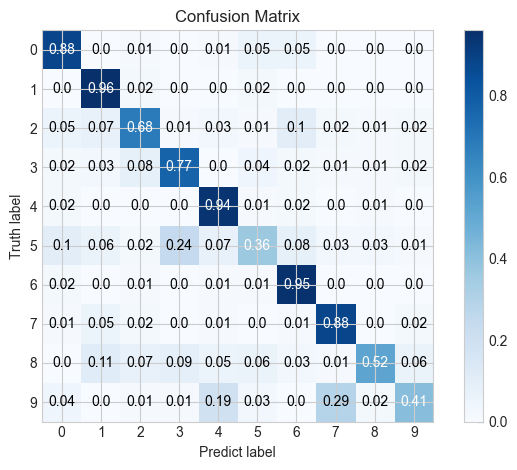

              precision  recall  f1-score   support
0              0.771930   0.880  0.822430   100.000
1              0.750000   0.960  0.842105   100.000
2              0.739130   0.680  0.708333   100.000
3              0.687500   0.770  0.726415   100.000
4              0.717557   0.940  0.813853   100.000
5              0.610169   0.360  0.452830   100.000
6              0.753968   0.950  0.840708   100.000
7              0.709677   0.880  0.785714   100.000
8              0.866667   0.520  0.650000   100.000
9              0.759259   0.410  0.532468   100.000
accuracy       0.735000   0.735  0.735000     0.735
macro avg      0.736586   0.735  0.717486  1000.000
weighted avg   0.736586   0.735  0.717486  1000.000

Kernel=sigmoid C=0.5 start training
Kernel=sigmoid C=0.5 Training spent 61.217261s.
Accuracy: 71.200000%


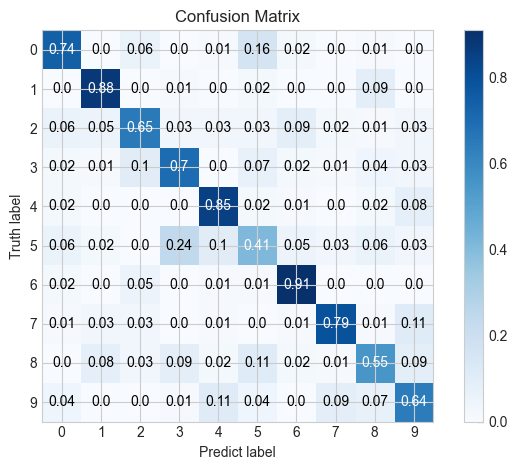

              precision  recall  f1-score   support
0              0.762887   0.740  0.751269   100.000
1              0.822430   0.880  0.850242   100.000
2              0.706522   0.650  0.677083   100.000
3              0.648148   0.700  0.673077   100.000
4              0.745614   0.850  0.794393   100.000
5              0.471264   0.410  0.438503   100.000
6              0.805310   0.910  0.854460   100.000
7              0.831579   0.790  0.810256   100.000
8              0.639535   0.550  0.591398   100.000
9              0.633663   0.640  0.636816   100.000
accuracy       0.712000   0.712  0.712000     0.712
macro avg      0.706695   0.712  0.707750  1000.000
weighted avg   0.706695   0.712  0.707750  1000.000

Kernel=sigmoid C=1 start training
Kernel=sigmoid C=1 Training spent 52.078714s.
Accuracy: 67.800000%


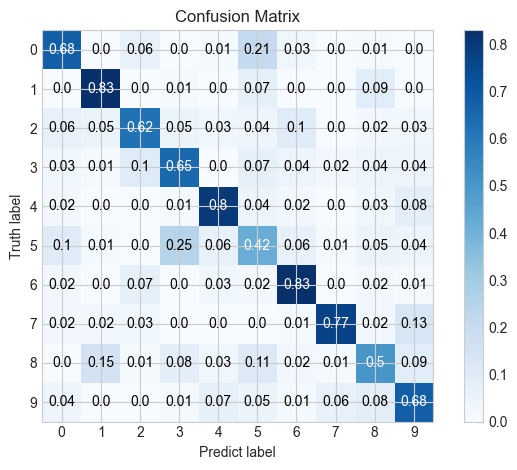

              precision  recall  f1-score   support
0              0.701031   0.680  0.690355   100.000
1              0.775701   0.830  0.801932   100.000
2              0.696629   0.620  0.656085   100.000
3              0.613208   0.650  0.631068   100.000
4              0.776699   0.800  0.788177   100.000
5              0.407767   0.420  0.413793   100.000
6              0.741071   0.830  0.783019   100.000
7              0.885057   0.770  0.823529   100.000
8              0.581395   0.500  0.537634   100.000
9              0.618182   0.680  0.647619   100.000
accuracy       0.678000   0.678  0.678000     0.678
macro avg      0.679674   0.678  0.677321  1000.000
weighted avg   0.679674   0.678  0.677321  1000.000

Kernel=sigmoid C=2 start training
Kernel=sigmoid C=2 Training spent 43.241453s.
Accuracy: 64.900000%


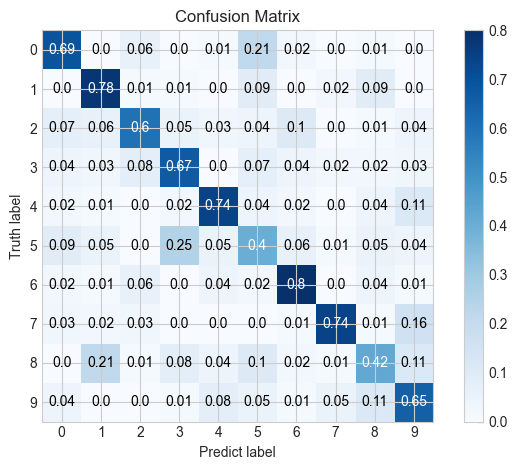

              precision  recall  f1-score   support
0              0.690000   0.690  0.690000   100.000
1              0.666667   0.780  0.718894   100.000
2              0.705882   0.600  0.648649   100.000
3              0.614679   0.670  0.641148   100.000
4              0.747475   0.740  0.743719   100.000
5              0.392157   0.400  0.396040   100.000
6              0.740741   0.800  0.769231   100.000
7              0.870588   0.740  0.800000   100.000
8              0.525000   0.420  0.466667   100.000
9              0.565217   0.650  0.604651   100.000
accuracy       0.649000   0.649  0.649000     0.649
macro avg      0.651841   0.649  0.647900  1000.000
weighted avg   0.651841   0.649  0.647900  1000.000

Kernel=sigmoid C=5 start training
Kernel=sigmoid C=5 Training spent 42.827799s.
Accuracy: 62.400000%


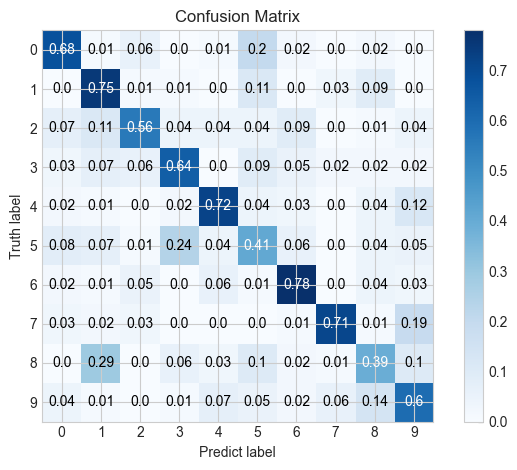

              precision  recall  f1-score   support
0              0.701031   0.680  0.690355   100.000
1              0.555556   0.750  0.638298   100.000
2              0.717949   0.560  0.629213   100.000
3              0.627451   0.640  0.633663   100.000
4              0.742268   0.720  0.730964   100.000
5              0.390476   0.410  0.400000   100.000
6              0.722222   0.780  0.750000   100.000
7              0.855422   0.710  0.775956   100.000
8              0.487500   0.390  0.433333   100.000
9              0.521739   0.600  0.558140   100.000
accuracy       0.624000   0.624  0.624000     0.624
macro avg      0.632161   0.624  0.623992  1000.000
weighted avg   0.632161   0.624  0.623992  1000.000

Kernel=sigmoid C=10 start training
Kernel=sigmoid C=10 Training spent 37.367980s.
Accuracy: 63.200000%


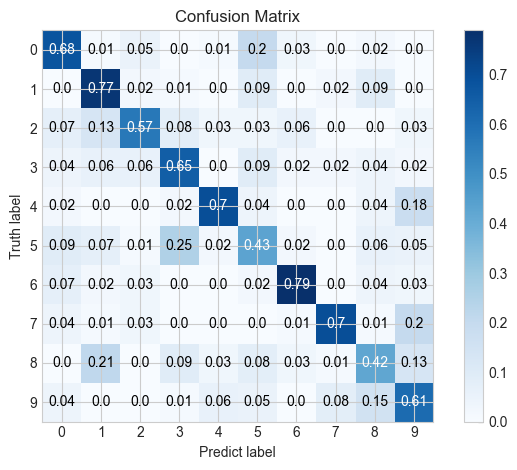

              precision  recall  f1-score   support
0              0.647619   0.680  0.663415   100.000
1              0.601562   0.770  0.675439   100.000
2              0.740260   0.570  0.644068   100.000
3              0.585586   0.650  0.616114   100.000
4              0.823529   0.700  0.756757   100.000
5              0.417476   0.430  0.423645   100.000
6              0.822917   0.790  0.806122   100.000
7              0.843373   0.700  0.765027   100.000
8              0.482759   0.420  0.449198   100.000
9              0.488000   0.610  0.542222   100.000
accuracy       0.632000   0.632  0.632000     0.632
macro avg      0.645308   0.632  0.634201  1000.000
weighted avg   0.645308   0.632  0.634201  1000.000

Kernel=rbf C=0.01 start training
Kernel=rbf C=0.01 Training spent 102.930760s.
Accuracy: 84.500000%


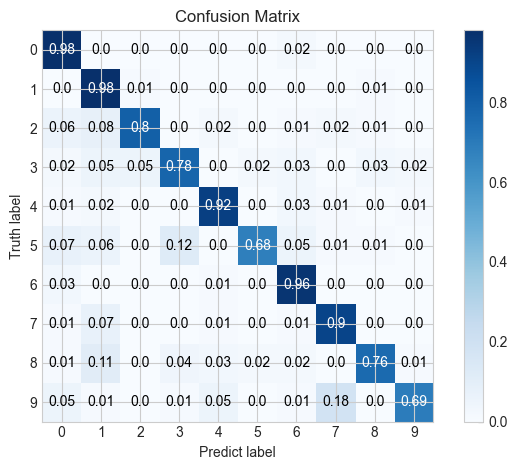

              precision  recall  f1-score   support
0              0.790323   0.980  0.875000   100.000
1              0.710145   0.980  0.823529   100.000
2              0.930233   0.800  0.860215   100.000
3              0.821053   0.780  0.800000   100.000
4              0.884615   0.920  0.901961   100.000
5              0.944444   0.680  0.790698   100.000
6              0.842105   0.960  0.897196   100.000
7              0.803571   0.900  0.849057   100.000
8              0.926829   0.760  0.835165   100.000
9              0.945205   0.690  0.797688   100.000
accuracy       0.845000   0.845  0.845000     0.845
macro avg      0.859852   0.845  0.843051  1000.000
weighted avg   0.859852   0.845  0.843051  1000.000

Kernel=rbf C=0.1 start training
Kernel=rbf C=0.1 Training spent 80.889166s.
Accuracy: 89.800000%


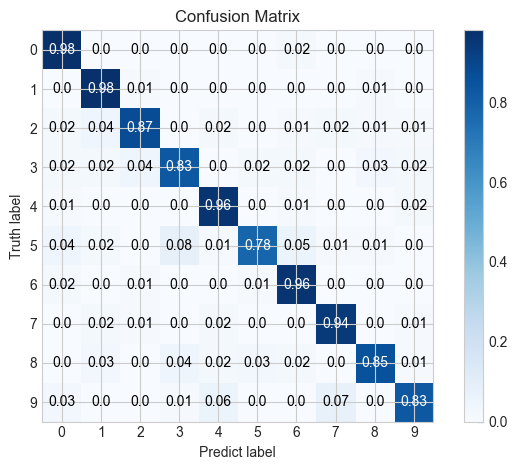

              precision  recall  f1-score   support
0              0.875000   0.980  0.924528   100.000
1              0.882883   0.980  0.928910   100.000
2              0.925532   0.870  0.896907   100.000
3              0.864583   0.830  0.846939   100.000
4              0.880734   0.960  0.918660   100.000
5              0.928571   0.780  0.847826   100.000
6              0.880734   0.960  0.918660   100.000
7              0.903846   0.940  0.921569   100.000
8              0.934066   0.850  0.890052   100.000
9              0.922222   0.830  0.873684   100.000
accuracy       0.898000   0.898  0.898000     0.898
macro avg      0.899817   0.898  0.896774  1000.000
weighted avg   0.899817   0.898  0.896774  1000.000

Kernel=rbf C=0.5 start training
Kernel=rbf C=0.5 Training spent 56.288367s.
Accuracy: 94.300000%


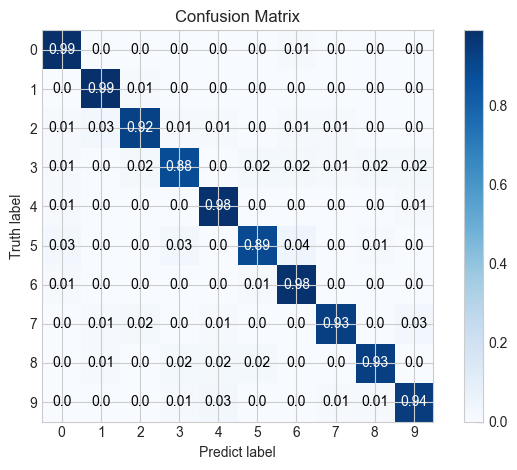

              precision  recall  f1-score   support
0              0.933962   0.990  0.961165   100.000
1              0.951923   0.990  0.970588   100.000
2              0.948454   0.920  0.934010   100.000
3              0.926316   0.880  0.902564   100.000
4              0.933333   0.980  0.956098   100.000
5              0.946809   0.890  0.917526   100.000
6              0.924528   0.980  0.951456   100.000
7              0.968750   0.930  0.948980   100.000
8              0.958763   0.930  0.944162   100.000
9              0.940000   0.940  0.940000   100.000
accuracy       0.943000   0.943  0.943000     0.943
macro avg      0.943284   0.943  0.942655  1000.000
weighted avg   0.943284   0.943  0.942655  1000.000

Kernel=rbf C=1 start training
Kernel=rbf C=1 Training spent 51.251226s.
Accuracy: 95.500000%


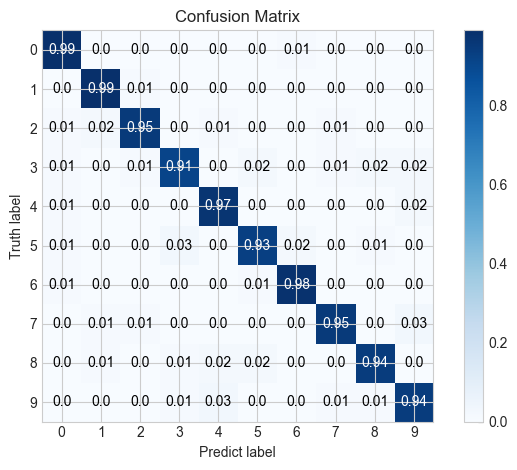

              precision  recall  f1-score   support
0              0.951923   0.990  0.970588   100.000
1              0.961165   0.990  0.975369   100.000
2              0.969388   0.950  0.959596   100.000
3              0.947917   0.910  0.928571   100.000
4              0.941748   0.970  0.955665   100.000
5              0.948980   0.930  0.939394   100.000
6              0.970297   0.980  0.975124   100.000
7              0.969388   0.950  0.959596   100.000
8              0.959184   0.940  0.949495   100.000
9              0.930693   0.940  0.935323   100.000
accuracy       0.955000   0.955  0.955000     0.955
macro avg      0.955068   0.955  0.954872  1000.000
weighted avg   0.955068   0.955  0.954872  1000.000

Kernel=rbf C=2 start training
Kernel=rbf C=2 Training spent 49.686045s.
Accuracy: 95.900000%


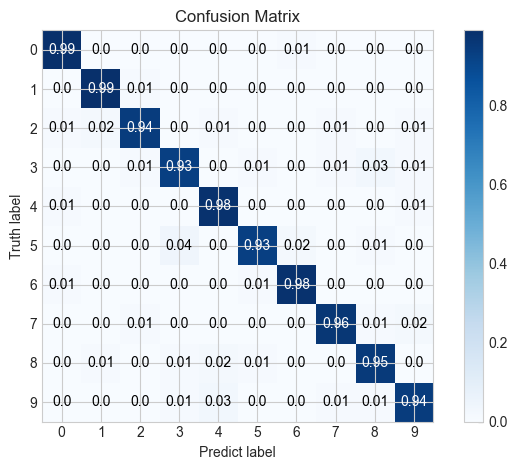

              precision  recall  f1-score   support
0              0.970588   0.990  0.980198   100.000
1              0.970588   0.990  0.980198   100.000
2              0.969072   0.940  0.954315   100.000
3              0.939394   0.930  0.934673   100.000
4              0.942308   0.980  0.960784   100.000
5              0.968750   0.930  0.948980   100.000
6              0.970297   0.980  0.975124   100.000
7              0.969697   0.960  0.964824   100.000
8              0.940594   0.950  0.945274   100.000
9              0.949495   0.940  0.944724   100.000
accuracy       0.959000   0.959  0.959000     0.959
macro avg      0.959078   0.959  0.958909  1000.000
weighted avg   0.959078   0.959  0.958909  1000.000

Kernel=rbf C=5 start training
Kernel=rbf C=5 Training spent 50.673800s.
Accuracy: 96.300000%


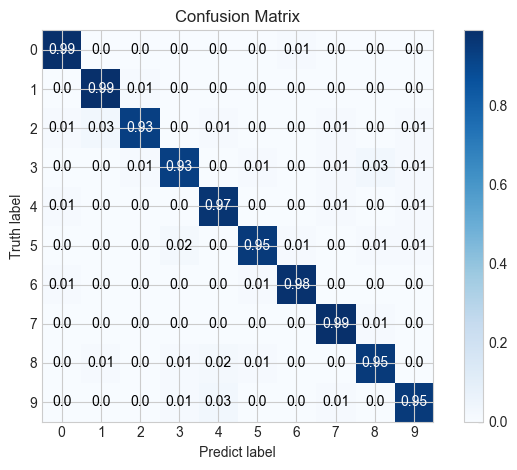

              precision  recall  f1-score   support
0              0.970588   0.990  0.980198   100.000
1              0.961165   0.990  0.975369   100.000
2              0.978947   0.930  0.953846   100.000
3              0.958763   0.930  0.944162   100.000
4              0.941748   0.970  0.955665   100.000
5              0.969388   0.950  0.959596   100.000
6              0.980000   0.980  0.980000   100.000
7              0.961165   0.990  0.975369   100.000
8              0.950000   0.950  0.950000   100.000
9              0.959596   0.950  0.954774   100.000
accuracy       0.963000   0.963  0.963000     0.963
macro avg      0.963136   0.963  0.962898  1000.000
weighted avg   0.963136   0.963  0.962898  1000.000

Kernel=rbf C=10 start training
Kernel=rbf C=10 Training spent 51.135155s.
Accuracy: 96.400000%


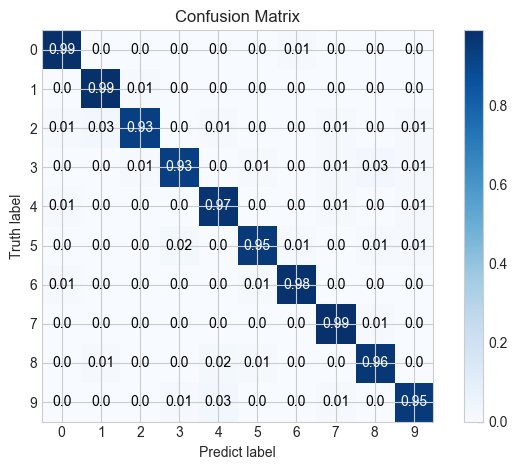

              precision  recall  f1-score   support
0              0.970588   0.990  0.980198   100.000
1              0.961165   0.990  0.975369   100.000
2              0.978947   0.930  0.953846   100.000
3              0.968750   0.930  0.948980   100.000
4              0.941748   0.970  0.955665   100.000
5              0.969388   0.950  0.959596   100.000
6              0.980000   0.980  0.980000   100.000
7              0.961165   0.990  0.975369   100.000
8              0.950495   0.960  0.955224   100.000
9              0.959596   0.950  0.954774   100.000
accuracy       0.964000   0.964  0.964000     0.964
macro avg      0.964184   0.964  0.963902  1000.000
weighted avg   0.964184   0.964  0.963902  1000.000

Kernel=poly C=0.01 start training
Kernel=poly C=0.01 Training spent 85.668088s.
Accuracy: 88.000000%


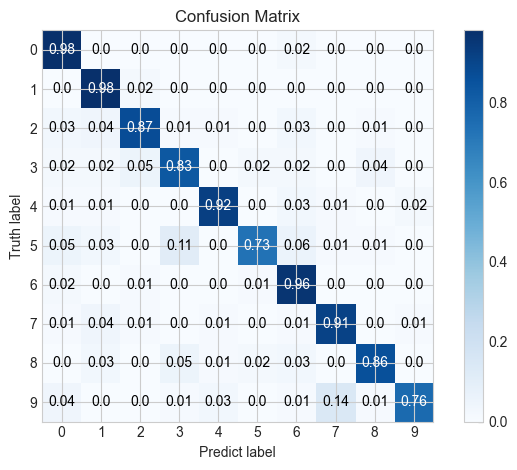

              precision  recall  f1-score  support
0              0.844828    0.98  0.907407   100.00
1              0.852174    0.98  0.911628   100.00
2              0.906250    0.87  0.887755   100.00
3              0.821782    0.83  0.825871   100.00
4              0.938776    0.92  0.929293   100.00
5              0.935897    0.73  0.820225   100.00
6              0.820513    0.96  0.884793   100.00
7              0.850467    0.91  0.879227   100.00
8              0.924731    0.86  0.891192   100.00
9              0.962025    0.76  0.849162   100.00
accuracy       0.880000    0.88  0.880000     0.88
macro avg      0.885744    0.88  0.878655  1000.00
weighted avg   0.885744    0.88  0.878655  1000.00

Kernel=poly C=0.1 start training
Kernel=poly C=0.1 Training spent 57.979548s.
Accuracy: 92.900000%


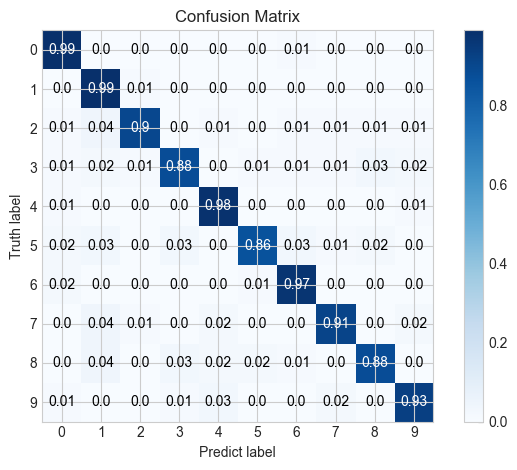

              precision  recall  f1-score   support
0              0.925234   0.990  0.956522   100.000
1              0.853448   0.990  0.916667   100.000
2              0.967742   0.900  0.932642   100.000
3              0.926316   0.880  0.902564   100.000
4              0.924528   0.980  0.951456   100.000
5              0.955556   0.860  0.905263   100.000
6              0.932692   0.970  0.950980   100.000
7              0.947917   0.910  0.928571   100.000
8              0.936170   0.880  0.907216   100.000
9              0.939394   0.930  0.934673   100.000
accuracy       0.929000   0.929  0.929000     0.929
macro avg      0.930900   0.929  0.928656  1000.000
weighted avg   0.930900   0.929  0.928656  1000.000

Kernel=poly C=0.5 start training
Kernel=poly C=0.5 Training spent 46.998881s.
Accuracy: 95.800000%


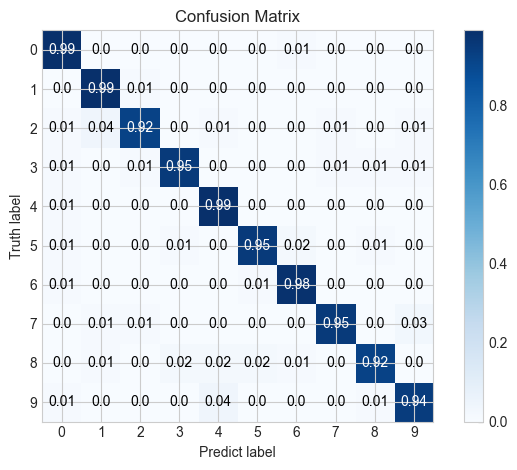

              precision  recall  f1-score   support
0              0.942857   0.990  0.965854   100.000
1              0.942857   0.990  0.965854   100.000
2              0.968421   0.920  0.943590   100.000
3              0.969388   0.950  0.959596   100.000
4              0.933962   0.990  0.961165   100.000
5              0.969388   0.950  0.959596   100.000
6              0.960784   0.980  0.970297   100.000
7              0.979381   0.950  0.964467   100.000
8              0.968421   0.920  0.943590   100.000
9              0.949495   0.940  0.944724   100.000
accuracy       0.958000   0.958  0.958000     0.958
macro avg      0.958495   0.958  0.957873  1000.000
weighted avg   0.958495   0.958  0.957873  1000.000

Kernel=poly C=1 start training
Kernel=poly C=1 Training spent 46.835152s.
Accuracy: 96.200000%


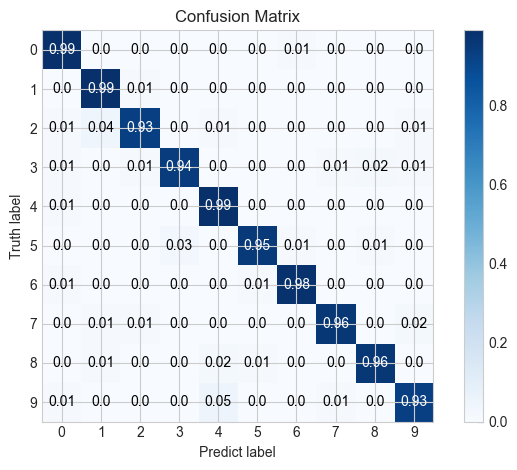

              precision  recall  f1-score   support
0              0.951923   0.990  0.970588   100.000
1              0.942857   0.990  0.965854   100.000
2              0.968750   0.930  0.948980   100.000
3              0.969072   0.940  0.954315   100.000
4              0.925234   0.990  0.956522   100.000
5              0.979381   0.950  0.964467   100.000
6              0.980000   0.980  0.980000   100.000
7              0.979592   0.960  0.969697   100.000
8              0.969697   0.960  0.964824   100.000
9              0.958763   0.930  0.944162   100.000
accuracy       0.962000   0.962  0.962000     0.962
macro avg      0.962527   0.962  0.961941  1000.000
weighted avg   0.962527   0.962  0.961941  1000.000

Kernel=poly C=2 start training
Kernel=poly C=2 Training spent 43.533782s.
Accuracy: 96.400000%


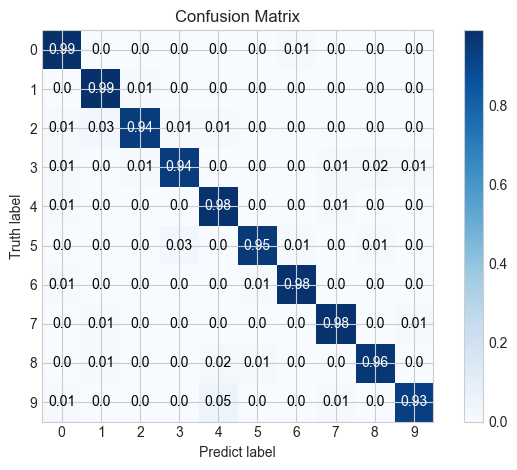

              precision  recall  f1-score   support
0              0.951923   0.990  0.970588   100.000
1              0.951923   0.990  0.970588   100.000
2              0.979167   0.940  0.959184   100.000
3              0.959184   0.940  0.949495   100.000
4              0.924528   0.980  0.951456   100.000
5              0.979381   0.950  0.964467   100.000
6              0.980000   0.980  0.980000   100.000
7              0.970297   0.980  0.975124   100.000
8              0.969697   0.960  0.964824   100.000
9              0.978947   0.930  0.953846   100.000
accuracy       0.964000   0.964  0.964000     0.964
macro avg      0.964505   0.964  0.963957  1000.000
weighted avg   0.964505   0.964  0.963957  1000.000

Kernel=poly C=5 start training
Kernel=poly C=5 Training spent 48.772290s.
Accuracy: 95.500000%


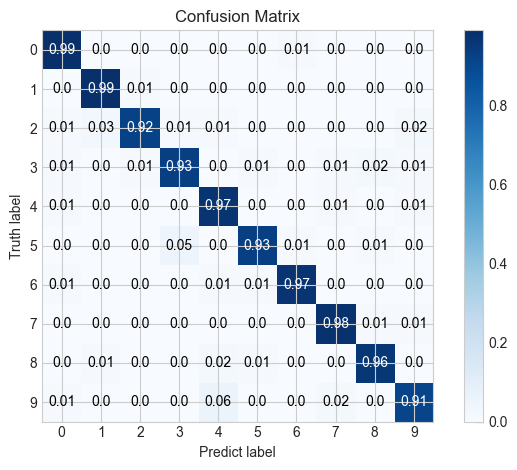

              precision  recall  f1-score   support
0              0.951923   0.990  0.970588   100.000
1              0.961165   0.990  0.975369   100.000
2              0.978723   0.920  0.948454   100.000
3              0.939394   0.930  0.934673   100.000
4              0.906542   0.970  0.937198   100.000
5              0.968750   0.930  0.948980   100.000
6              0.979798   0.970  0.974874   100.000
7              0.960784   0.980  0.970297   100.000
8              0.960000   0.960  0.960000   100.000
9              0.947917   0.910  0.928571   100.000
accuracy       0.955000   0.955  0.955000     0.955
macro avg      0.955500   0.955  0.954901  1000.000
weighted avg   0.955500   0.955  0.954901  1000.000

Kernel=poly C=10 start training
Kernel=poly C=10 Training spent 40.411500s.
Accuracy: 95.500000%


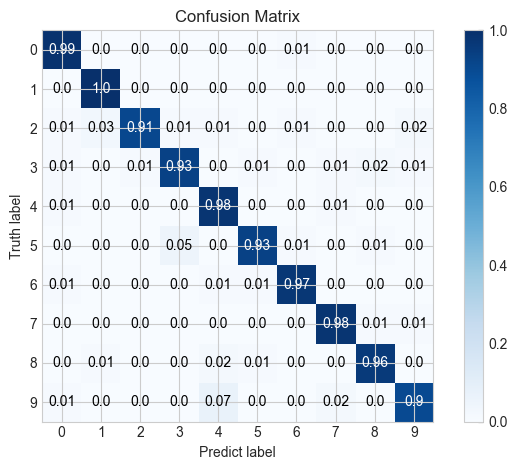

              precision  recall  f1-score   support
0              0.951923   0.990  0.970588   100.000
1              0.961538   1.000  0.980392   100.000
2              0.989130   0.910  0.947917   100.000
3              0.939394   0.930  0.934673   100.000
4              0.899083   0.980  0.937799   100.000
5              0.968750   0.930  0.948980   100.000
6              0.970000   0.970  0.970000   100.000
7              0.960784   0.980  0.970297   100.000
8              0.960000   0.960  0.960000   100.000
9              0.957447   0.900  0.927835   100.000
accuracy       0.955000   0.955  0.955000     0.955
macro avg      0.955805   0.955  0.954848  1000.000
weighted avg   0.955805   0.955  0.954848  1000.000

Kernel=linear C=0.01 start training
Kernel=linear C=0.01 Training spent 164.113621s.
Accuracy: 79.500000%


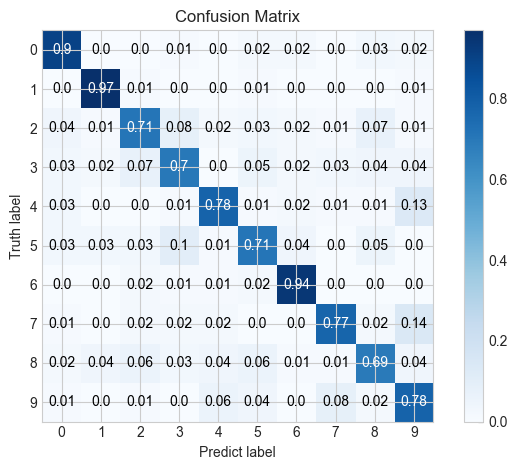

              precision  recall  f1-score   support
0              0.841121   0.900  0.869565   100.000
1              0.906542   0.970  0.937198   100.000
2              0.763441   0.710  0.735751   100.000
3              0.729167   0.700  0.714286   100.000
4              0.829787   0.780  0.804124   100.000
5              0.747368   0.710  0.728205   100.000
6              0.878505   0.940  0.908213   100.000
7              0.846154   0.770  0.806283   100.000
8              0.741935   0.690  0.715026   100.000
9              0.666667   0.780  0.718894   100.000
accuracy       0.795000   0.795  0.795000     0.795
macro avg      0.795069   0.795  0.793754  1000.000
weighted avg   0.795069   0.795  0.793754  1000.000

Kernel=linear C=0.1 start training
Kernel=linear C=0.1 Training spent 374.017124s.
Accuracy: 77.700000%


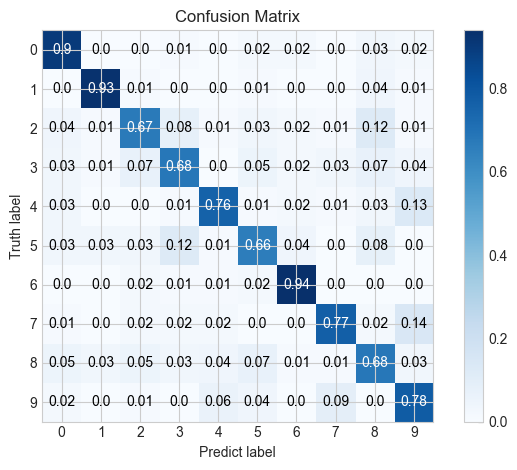

              precision  recall  f1-score   support
0              0.810811   0.900  0.853081   100.000
1              0.920792   0.930  0.925373   100.000
2              0.761364   0.670  0.712766   100.000
3              0.708333   0.680  0.693878   100.000
4              0.835165   0.760  0.795812   100.000
5              0.725275   0.660  0.691099   100.000
6              0.878505   0.940  0.908213   100.000
7              0.836957   0.770  0.802083   100.000
8              0.635514   0.680  0.657005   100.000
9              0.672414   0.780  0.722222   100.000
accuracy       0.777000   0.777  0.777000     0.777
macro avg      0.778513   0.777  0.776153  1000.000
weighted avg   0.778513   0.777  0.776153  1000.000

Kernel=linear C=0.5 start training


KeyboardInterrupt: 

In [189]:
import time
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Assuming y_train and y_test are already defined as in your code

kernel_list = ['sigmoid', 'rbf', 'poly', 'linear']
C = [0.01, 0.1, 1, 10]

train_x, train_y = select_data(5000, x_train.values, y_train)
test_x, test_y = select_data(1000, x_test.values, y_test)

for kernel in kernel_list:
    for c in C:
        print("\nKernel={} C={} start training".format(kernel, c))
        start = time.perf_counter()
   
        svm_model = train(kernel, c, train_x, train_y)
    
        end = time.perf_counter()
        print("Kernel={} C={} Training spent {:.6f}s.\n".format(kernel, c, (end - start)))

        test(svm_model, test_x, test_y, 'SVM Kernel={} C={}.csv'.format(kernel, c))


Kernel=linear C=1 start training
Kernel=linear C=1 Training spent 518.772272s.
Accuracy: 79.300000%


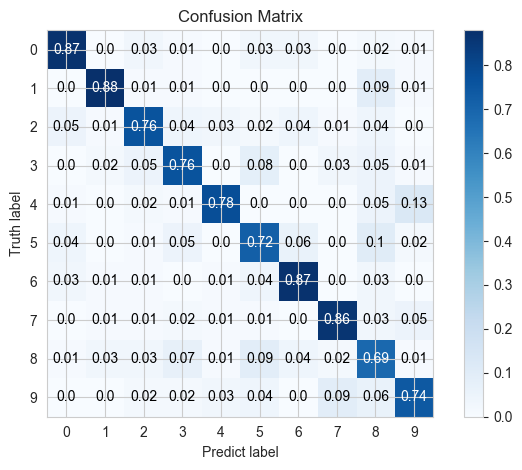

              precision  recall  f1-score   support
0              0.861386   0.870  0.865672   100.000
1              0.916667   0.880  0.897959   100.000
2              0.800000   0.760  0.779487   100.000
3              0.767677   0.760  0.763819   100.000
4              0.896552   0.780  0.834225   100.000
5              0.699029   0.720  0.709360   100.000
6              0.836538   0.870  0.852941   100.000
7              0.851485   0.860  0.855721   100.000
8              0.594828   0.690  0.638889   100.000
9              0.755102   0.740  0.747475   100.000
accuracy       0.793000   0.793  0.793000     0.793
macro avg      0.797926   0.793  0.794555  1000.000
weighted avg   0.797926   0.793  0.794555  1000.000

Kernel=linear C=10 start training
Kernel=linear C=10 Training spent 515.970908s.
Accuracy: 79.300000%


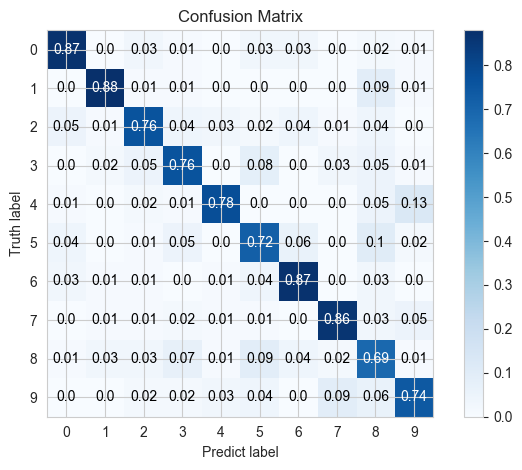

              precision  recall  f1-score   support
0              0.861386   0.870  0.865672   100.000
1              0.916667   0.880  0.897959   100.000
2              0.800000   0.760  0.779487   100.000
3              0.767677   0.760  0.763819   100.000
4              0.896552   0.780  0.834225   100.000
5              0.699029   0.720  0.709360   100.000
6              0.836538   0.870  0.852941   100.000
7              0.851485   0.860  0.855721   100.000
8              0.594828   0.690  0.638889   100.000
9              0.755102   0.740  0.747475   100.000
accuracy       0.793000   0.793  0.793000     0.793
macro avg      0.797926   0.793  0.794555  1000.000
weighted avg   0.797926   0.793  0.794555  1000.000


In [23]:
import time
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Assuming y_train and y_test are already defined as in your code

kernel_list = ['linear']
C = [1, 10]

train_x, train_y = select_data(5000, x_train.values, y_train)
test_x, test_y = select_data(1000, x_test.values, y_test)

for kernel in kernel_list:
    for c in C:
        print("\nKernel={} C={} start training".format(kernel, c))
        start = time.perf_counter()
   
        svm_model = train(kernel, c, train_x, train_y)
    
        end = time.perf_counter()
        print("Kernel={} C={} Training spent {:.6f}s.\n".format(kernel, c, (end - start)))

        test(svm_model, test_x, test_y, 'SVM Kernel={} C={}.csv'.format(kernel, c))

In [13]:
data = pd.read_csv('./data/train.csv')
x = data.iloc[:,data.columns!='label']
y = data.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

test_x, test_y = select_data(7000, x_test.values, y_test, True)

Count of 0 in selected_y_train: 700
Count of 1 in selected_y_train: 700
Count of 2 in selected_y_train: 700
Count of 3 in selected_y_train: 700
Count of 4 in selected_y_train: 700
Count of 5 in selected_y_train: 700
Count of 6 in selected_y_train: 700
Count of 7 in selected_y_train: 700
Count of 8 in selected_y_train: 700
Count of 9 in selected_y_train: 700


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

train_x, train_y = select_data(20000, x_train.values, y_train)

# 定义C的候选值
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 输出10
# param_grid = {'C': [2, 4, 6, 8, 10, 12, 14]} 输出10
# param_grid = {'C': [9.0, 9.5, 10.0, 10.5, 11.0]} 输出9.5
param_grid = {'C': [9.1, 9.3, 9.5, 9.7, 9.9]}

kernel = 'poly'

# 创建SVM模型
svm_model = SVC(kernel=kernel, probability=True)

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# 输出最佳参数
print("Best C:", grid_search.best_params_)

best_c = grid_search.best_params_

Best C: {'C': 9.5}


In [20]:
import time

scores = []
tra=[]
time_spend=[]
kernel = 'poly'

print(best_c['C'])
c = best_c['C']


for i in range(2000, 31000, 2000):
    print("Size {} Start!".format(i))
    train_x, train_y = select_data(i, x_train.values, y_train)
    start = time.perf_counter()
    model = train(kernel, c, train_x, train_y)
    end = time.perf_counter()
    print("Kernel={} Training spent {:.6f}s.".format(kernel, (end - start)))
    time_spend += [end - start]
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)*100
    scores += [accuracy]
    print(f"Accuracy: {accuracy:.6f}%")
    tra += [i]
    print("Size {} Finished!\n".format(i))

9.5
Size 2000 Start!
Kernel=poly Training spent 5.066038s.
Accuracy: 94.028571%
Size 2000 Finished!

Size 4000 Start!
Kernel=poly Training spent 24.016941s.
Accuracy: 95.214286%
Size 4000 Finished!

Size 6000 Start!
Kernel=poly Training spent 52.399147s.
Accuracy: 96.057143%
Size 6000 Finished!

Size 8000 Start!
Kernel=poly Training spent 85.104588s.
Accuracy: 96.471429%
Size 8000 Finished!

Size 10000 Start!
Kernel=poly Training spent 124.933312s.
Accuracy: 96.642857%
Size 10000 Finished!

Size 12000 Start!
Kernel=poly Training spent 181.299632s.
Accuracy: 96.828571%
Size 12000 Finished!

Size 14000 Start!
Kernel=poly Training spent 229.595972s.
Accuracy: 97.028571%
Size 14000 Finished!

Size 16000 Start!
Kernel=poly Training spent 281.240933s.
Accuracy: 97.285714%
Size 16000 Finished!

Size 18000 Start!
Kernel=poly Training spent 337.344898s.
Accuracy: 97.357143%
Size 18000 Finished!

Size 20000 Start!
Kernel=poly Training spent 406.954404s.
Accuracy: 97.571429%
Size 20000 Finished!


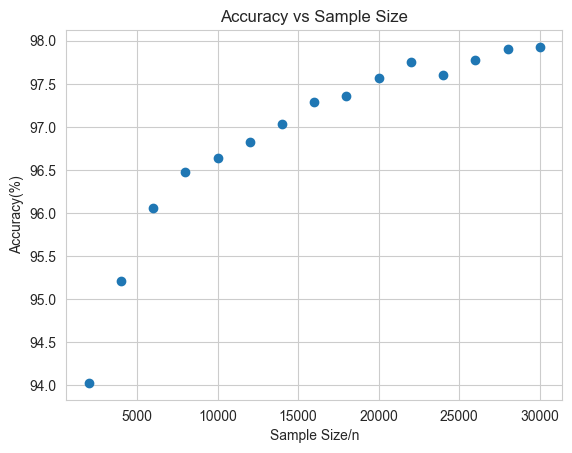

In [21]:
plt.scatter(tra, scores)
plt.title('Accuracy vs Sample Size')
plt.xlabel('Sample Size/n')
plt.ylabel('Accuracy(%)')
plt.show()

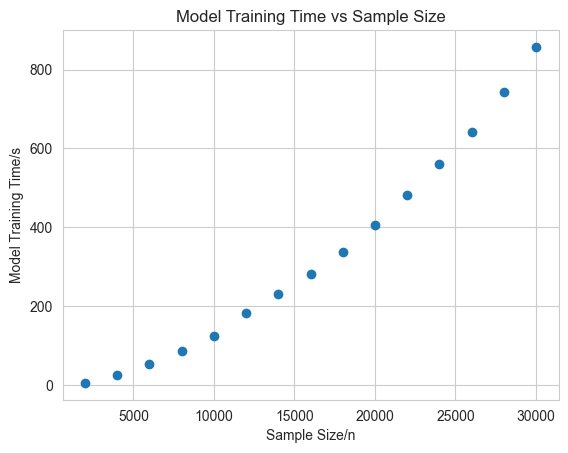

In [22]:
plt.scatter(tra, time_spend)
plt.title('Model Training Time vs Sample Size')
plt.xlabel('Sample Size/n')
plt.ylabel('Model Training Time/s')
plt.show()

Count of 0 in selected_y_train: 700
Count of 1 in selected_y_train: 700
Count of 2 in selected_y_train: 700
Count of 3 in selected_y_train: 700
Count of 4 in selected_y_train: 700
Count of 5 in selected_y_train: 700
Count of 6 in selected_y_train: 700
Count of 7 in selected_y_train: 700
Count of 8 in selected_y_train: 700
Count of 9 in selected_y_train: 700
Size 30000 Start!
Kernel=poly Training spent 885.957067s.
Accuracy: 97.914286%
Size 30000 Finished!
Accuracy: 97.914286%


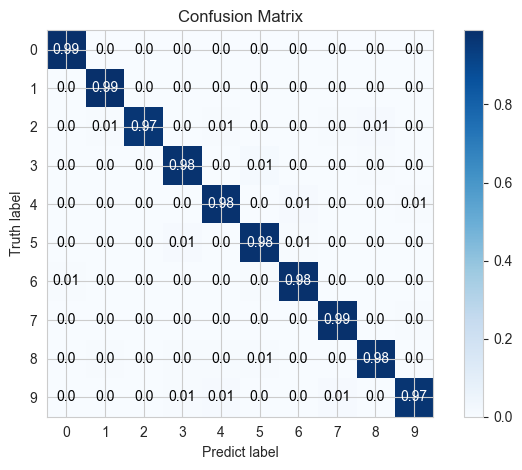

              precision    recall  f1-score      support
0              0.988571  0.988571  0.988571   700.000000
1              0.982979  0.990000  0.986477   700.000000
2              0.986861  0.965714  0.976173   700.000000
3              0.972934  0.975714  0.974322   700.000000
4              0.974395  0.978571  0.976479   700.000000
5              0.968883  0.978571  0.973703   700.000000
6              0.980085  0.984286  0.982181   700.000000
7              0.978723  0.985714  0.982206   700.000000
8              0.975749  0.977143  0.976445   700.000000
9              0.982583  0.967143  0.974802   700.000000
accuracy       0.979143  0.979143  0.979143     0.979143
macro avg      0.979177  0.979143  0.979136  7000.000000
weighted avg   0.979177  0.979143  0.979136  7000.000000


In [15]:
kernel = 'poly'
c = 9.5
i = 30000
data = pd.read_csv('./data/train.csv')
x = data.iloc[:,data.columns!='label']
y = data.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

test_x, test_y = select_data(7000, x_test.values, y_test, True)
print("Size {} Start!".format(i))
train_x, train_y = select_data(i, x_train.values, y_train)
start = time.perf_counter()
model = train(kernel, c, train_x, train_y)
end = time.perf_counter()
print("Kernel={} Training spent {:.6f}s.".format(kernel, (end - start)))
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100
print(f"Accuracy: {accuracy:.6f}%")
print("Size {} Finished!\n".format(i))
test(model, test_x, test_y, 'SVM Kernel={} C={}.csv'.format(kernel, c))

[array([5], dtype=int64), array([9], dtype=int64), array([0], dtype=int64), array([8], dtype=int64), array([0], dtype=int64), array([3], dtype=int64), array([4], dtype=int64), array([2], dtype=int64), array([7], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([4], dtype=int64)]


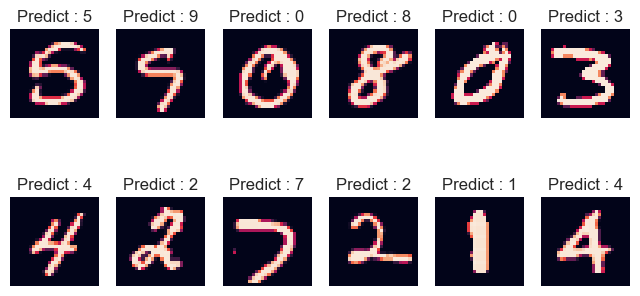

In [28]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

i = 0
predict = []

fig = plt.figure(figsize=(8,4))
cols, rows = 6,2

for i in range(1,cols*rows+1):
    sample = np.random.randint(0,len(x)-1)
    label = str(int(y[sample]))
    img = x.values[sample].reshape(28,28)
    
    test = [x.values[sample]]
    pred_ = model.predict(test)
    predict += [pred_]
    
    fig.add_subplot(rows,cols,i)
    plt.title("Predict : {}".format(pred_[0]))
    plt.axis('off')
    plt.imshow(img)

print(predict)